In [1]:
import numpy as np
import math

### On the upper bound for the mathematical expectation of the norm of a uniformly distributed on the sphere vector and the phenomenon of the uniform measure concentration on the sphere

<i>Eduard Gorbunov</i> 
<br/>
Moscow Institute of Physics and Technology (Moscow, Russia) 
<br/>
<i>Evgeniya Vorontsova</i> 
<br/>
Far Eastern Federal University (Vladivostok, Russia)
<br/>
<i>Alexander Gasnikov</i> 
<br/>
Moscow Institute of Physics and Technology (Moscow, Russia) 
<br/>

Article (in Russian): 
<i>https://arxiv.org/abs/1804.03722</i>

In [2]:
def montecarlo(f, X, q, n, eps, gr = False, fs = False, s = []):
    """
    Function to compute the Monte Carlo estimate of the expectation
    E[f(X)], with N samples
   
    Inputs:
    f - a Python function that applies a chosen mathematical function to
    each entry in a numpy array
    X - a Python function that takes N as input and returns
    independent individually distributed random samples from a chosen
    probability distribution
    N - the number of samples to use
    q -- additional parametr for f
    """
    N = 2
    if fs:
        Fx = [f(X(n), q, n, s)]
    else:    
        Fx = [f(X(n), q, n)]
        
    mc_err = eps
    mc_int = 1
    
    if gr:
        plt_estint = []
        plt_esterr = []
        
    while mc_err >= eps or N < 10:
        
        if fs:
            Fx.append(f(X(n), q, n, s))
        else:    
            Fx.append(f(X(n), q, n))
        
        int_sum = np.sum(Fx)
        mc_int = int_sum / N
        
        sq = [x*x for x in Fx]
        sq = abs((np.sum(sq)/N - mc_int*mc_int) / N)
        mc_err = math.sqrt(sq)
        
        if gr:
            plt_estint.append(mc_int)
            plt_esterr.append(mc_err) 
        
        N += 1

    if gr:    
        
        %matplotlib notebook
        import matplotlib.pyplot as plt
        plt.grid(True)
        plt.plot(range(2, N), plt_estint, label = 'mc_int')
        twope = [2*pe for pe in plt_esterr]
        mtwope = [-2*pe for pe in plt_esterr]
        plt.plot(range(2, N), [sum(pe) for pe in zip(plt_estint, twope)])
        plt.plot(range(2, N), [sum(pe) for pe in zip(plt_estint, mtwope)])
        plt.legend()        

    return mc_int, N-1

In [3]:
def func(e, q, n):
    # Inputs:  
    # e - a numpy array of values
    # q - norm
    # n - length of e
    norm_e = np.linalg.norm(e, q)
    sq = norm_e*norm_e
    if q == np.inf:
        return sq  / pow(n, -1.0)
    else:    
        return sq  / pow(n, 2./q - 1)

In [4]:
# Generating uniformly distributed numbers on a sphere
def get_rand_vec(dims):
    e = np.random.standard_normal(int(dims))
    return e / np.linalg.norm(e)

In [11]:
nrange = range(10, int(1e5), 100)
narr = np.array(nrange)

plt1 = []
q = np.inf
for i, n in enumerate(narr):
    
    pract_estimate, N = montecarlo(func, get_rand_vec, q, n, 1e-1, False) 
    if q == np.inf:
        theor_estimate = 16*math.log(n) - 8 
    else:
        theor_estimate = min([q - 1, 16*math.log(n) - 8]) 
    plt1.append(pract_estimate / theor_estimate)
    if i%100 == 1:
        print('n = ', n, ', pract  = ', pract_estimate, ', from lemma = ', theor_estimate, N) 
        


n =  110 , pract  =  7.871517656739005 , from lemma =  67.20768585267867 411
n =  10110 , pract  =  16.32951862919805 , from lemma =  139.54048499223228 641
n =  20110 , pract  =  17.60178571350036 , from lemma =  150.54355972426717 601
n =  30110 , pract  =  18.38011079651487 , from lemma =  157.00180194361246 604
n =  40110 , pract  =  18.69925665994566 , from lemma =  161.5900953402256 545
n =  50110 , pract  =  19.249149816355732 , from lemma =  165.15161388726034 552
n =  60110 , pract  =  19.612910120565132 , from lemma =  168.0629039365313 560
n =  70110 , pract  =  20.064766930623165 , from lemma =  170.52513145921623 650
n =  80110 , pract  =  20.197498234240232 , from lemma =  172.6584955073466 527
n =  90110 , pract  =  20.42765434421793 , from lemma =  174.54058280366533 590


<IPython.core.display.Javascript object>


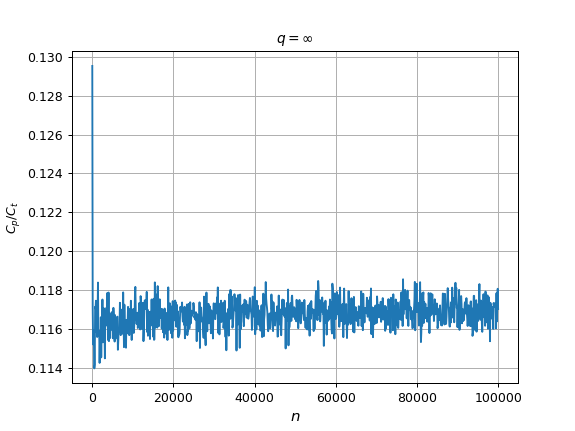

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(nrange, plt1)
plt.xlabel(r"$n$", fontsize=12)
plt.ylabel(r"$C_p/C_t$", fontsize=10)
plt.title(r"$q = \infty$", fontsize = 11);
#plt.legend()

#### Второе неравенство, с вектором $s$

In [7]:
def func_es(e, q, n, s):
    # Inputs:  
    # e - a numpy array of values
    # q - norm
    # n - length of e
    # s - vector
    norm_e = np.linalg.norm(e, q)
    sq_e = norm_e*norm_e
    
    se = s.T.dot(e)
    se2 = se*se
    
    if q == np.inf:
        return float(sq_e*se2  / pow(n, -2.0)) 
    else:    
        return float(sq_e*se2  / pow(n, 2./q - 2)) 

Не ограничивая общности, будем считать, что $s$ --- просто орт $(1, \, 0, \, 0, \, \ldots)$

In [8]:
nrange = range(10, int(1e4), 100)
narr = np.array(nrange)

plt2 = []
q = np.inf
for i, n in enumerate(narr):
    
    s = np.zeros([n, 1])
    s[0] = 1
    
    pract_estimate, N = montecarlo(func_es, get_rand_vec, q, n, 1e-1, False, True, s) 
    
    norm_s = np.linalg.norm(s, 2)
    sq_norm_s = norm_s*norm_s
    
    if q == np.inf:
        theor_estimate = math.sqrt(3)*sq_norm_s*(32*math.log(n) - 8) 
    else:
        theor_estimate = math.sqrt(3) * sq_norm_s*min([2*q - 1, 32*math.log(n) - 8]) 
    plt2.append(pract_estimate / theor_estimate)
    if i%10 == 1:
        print('n = ', n, ', pract  = ', pract_estimate, ', from lemma = ', theor_estimate, N) 
        


n =  110 , pract  =  7.875647117614299 , from lemma =  246.670659572486 15137
n =  1110 , pract  =  12.121210303532397 , from lemma =  374.79447220407104 30843
n =  2110 , pract  =  13.498102183351714 , from lemma =  410.39589984017476 38870
n =  3110 , pract  =  13.904348487844116 , from lemma =  431.8974277357547 41035
n =  4110 , pract  =  14.562827804708691 , from lemma =  447.3501089766702 44604
n =  5110 , pract  =  14.98466485989827 , from lemma =  459.42050089390364 47303
n =  6110 , pract  =  15.327253349879777 , from lemma =  469.32657717407955 48473
n =  7110 , pract  =  15.590926884589773 , from lemma =  477.72774249616515 50214
n =  8110 , pract  =  15.716748988732332 , from lemma =  485.0215123317628 52648
n =  9110 , pract  =  16.07448605944338 , from lemma =  491.4661182827533 53791


<IPython.core.display.Javascript object>


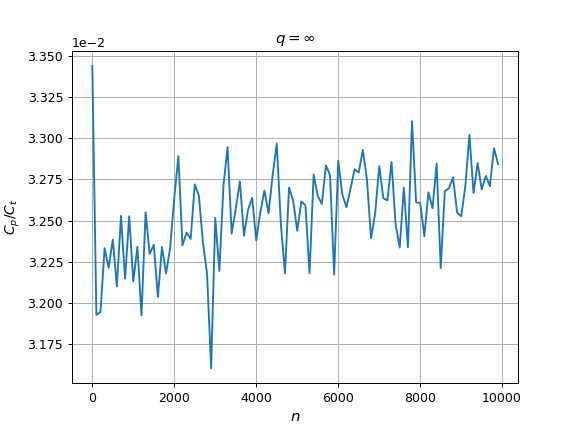

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(nrange, plt2)
plt.xlabel(r"$n$", fontsize=12)
plt.ticklabel_format(style='sci', axis='y', scilimits=(-2, 2))
plt.ylabel(r"$C_p/C_t$", fontsize=11)
plt.title(r"$q = \infty$", fontsize = 12);